## Data Preparation 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from sklearn import svm
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df_fashion = pd.read_csv('/content/generated_AMAZON_FASHION_5.csv')
df_fashion = df_fashion.drop(columns='input_text')
df_fashion.head(5)

,target_text,generated_text
0,Pinnacle seems to have more cushioning so my h...,I have been using cushioning for the last 10 y...
1,"great price for the product, though the sizes ...",I was excited to find this product at such a c...
2,Good fit even after washing in hot water to fo...,I have a very nice Fit Wash that I can order a...
3,Great shoe. I've had Nike's before and have al...,I have been using these for over 30 years and ...
4,It looks a bit nicer on the picture. Its very ...,I like this bit of a picture of the light way ...


In [3]:
df_app = pd.read_csv('/content/generated_Appliances_5.csv')
df_app = df_app.drop(columns='input_text')
df_app.head(5)

,target_text,generated_text
0,This is a complete kit for cleaning the dryer ...,I bought this kit to use as the clean out kit....
1,Anyone who thinks they don't have a problem wi...,I have a problem with lint in the house vents....
2,"I used this today, going in from the roof.\n\n...",I think it is possible to use this after I sho...
3,I used these (2) hoses to replace the original...,I have a pneumatizer with rubber in it and I h...
4,Getting these burner covers at stores used to ...,Get Started using this burner! I didn't realiz...


In [4]:
df_grocery = pd.read_csv('/content/generated_Grocery_and_Gourmet_Food_5.csv')
df_grocery.columns =['input_text', 'target_text', 'generated_text']
df_grocery = df_grocery.drop(columns='input_text')
df_grocery.head(5)

,target_text,generated_text
0,I have just used this on a stir fry and was pl...,I like how afrier I can flavor this drink. I d...
1,A great vareity of Magic Blends. Each one brin...,Varieties in flavor: From the meat to the vege...
2,I drink this tea at night just before bed. It ...,I was using Teas a nightly bedbug problem. I h...
3,I use these in place of wheat or any other gra...,"Nope. I don't like baking wheat, so I buy this..."
4,It's fun to have this drink as a memory of Per...,I like that this drink doesn't have to be expe...


In [5]:
df_software = pd.read_csv('/content/generated_Software_5.csv')
df_software.columns =['input_text', 'target_text', 'generated_text']
df_software = df_software.drop(columns='input_text')
df_software.head(5)

,target_text,generated_text
0,If you have any problems you will not be able ...,I really love using these products. I didn't r...
1,"Because, while I'm not about to go looking und...",I was looking for a product that will help min...
2,Corel VideoStudio Ultimate X8 installed on my ...,I have used Desktop for years and loved it.......
3,My last experience with a Peachtree accounting...,I have had experience with accounting products...
4,I downloaded the demo from their site. It didn...,I have been using Demonstrator when not writin...


In [6]:
df = pd.concat([df_fashion, df_app, df_grocery, df_software], ignore_index=True)

In [7]:
data_real = df[['target_text']].copy()
data_real.insert(1, 'label', 0)

In [8]:
data_fake = df[['generated_text']].copy()
data_fake.insert(1, 'label', 1)

In [9]:
data_real = data_real.rename(columns={'target_text':'text'})
data_fake = data_fake.rename(columns={'generated_text':'text'})

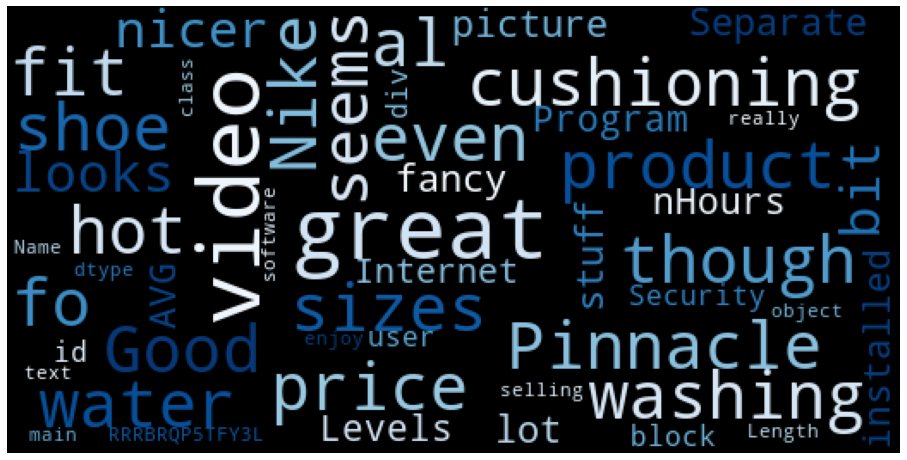

In [10]:
# Wordcloud of Real reviews
wordcloud = WordCloud(width=520, height=260, stopwords=set(STOPWORDS), max_font_size=50, background_color ="black", colormap='Blues').generate(str(data_real['text']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off') # turn off axis
plt.show()

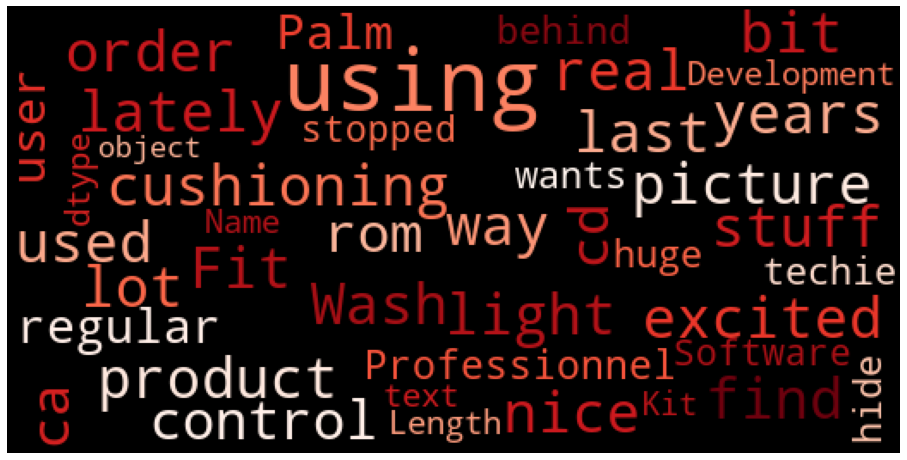

In [11]:
# Wordcloud of Fake reviews
wordcloud = WordCloud(width=520, height=260, stopwords=set(STOPWORDS), max_font_size=50, background_color ="black", colormap='Reds').generate(str(data_fake['text']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off') # turn off axis
plt.show()

In [12]:
reviews = [data_real, data_fake]
data = pd.concat(reviews, ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data

,text,label
0,"I really like this product. It's all good, huh...",1
1,I have been agoda for too long and I was final...,1
2,I'm in the fall of 2015 and this is the perfec...,1
3,This game was probably one of the scarier Nanc...,0
4,"Basically the program is fine, easy to use. I...",0
...,...,...
7151,I use this sulfate detox program. It's really ...,1
7152,I've owned several different virus programs ov...,0
7153,I received this box because I didn't think it ...,1
7154,I was looking for a product that will meet you...,1


## Data Preprocessing

In [13]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [14]:
data["text"] = data["text"].apply(wordopt)

In [15]:
X = data['text']
y = data['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
tfidf = TfidfVectorizer()
Xv_train = tfidf.fit_transform(X_train)
Xv_test = tfidf.transform(X_test)

## Logistic Regression

In [18]:
log = LogisticRegression()
log.fit(Xv_train,y_train)
pred_log = log.predict(Xv_test)

In [19]:
log.score(Xv_test, y_test)

0.9245388485187256

In [20]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       922
           1       0.93      0.92      0.92       867

    accuracy                           0.92      1789
   macro avg       0.92      0.92      0.92      1789
weighted avg       0.92      0.92      0.92      1789



## Decision Tree Classification

In [21]:
decision = DecisionTreeClassifier()
decision.fit(Xv_train, y_train)
pred_decision = decision.predict(Xv_test)

In [22]:
decision.score(Xv_test, y_test)

0.8065958636109558

In [23]:
print(classification_report(y_test, pred_decision))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       922
           1       0.80      0.81      0.80       867

    accuracy                           0.81      1789
   macro avg       0.81      0.81      0.81      1789
weighted avg       0.81      0.81      0.81      1789



## Gradient Boosting Classifier

In [24]:
gradient = GradientBoostingClassifier(random_state=0)
gradient.fit(Xv_train, y_train)
pred_gbc = gradient.predict(Xv_test)

In [25]:
gradient.score(Xv_test, y_test)

0.8943543879262158

In [26]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       922
           1       0.88      0.90      0.89       867

    accuracy                           0.89      1789
   macro avg       0.89      0.89      0.89      1789
weighted avg       0.89      0.89      0.89      1789



## Random Forest Classifier

In [27]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(Xv_train, y_train)
pred_rfc = random_forest.predict(Xv_test)

In [28]:
random_forest.score(Xv_test, y_test)

0.9032979318054779

In [29]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       922
           1       0.87      0.95      0.90       867

    accuracy                           0.90      1789
   macro avg       0.91      0.90      0.90      1789
weighted avg       0.91      0.90      0.90      1789



## SVM

In [30]:
svc_poly = svm.SVC(kernel='poly', C=1, degree=1).fit(Xv_train, y_train.values.ravel())
print("poly", svc_poly.score(Xv_test, y_test))

poly 0.9334823923979877


In [31]:
predictions_SVM = svc_poly.predict(Xv_test)
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       922
           1       0.93      0.93      0.93       867

    accuracy                           0.93      1789
   macro avg       0.93      0.93      0.93      1789
weighted avg       0.93      0.93      0.93      1789

